In [32]:
## Task 1 for one iteration (Just testing for one needle)
import random 
import time 
import math

needle_length = 0.7
space_btw_line = 1

d_btw_needle_line = random.uniform(0,space_btw_line/2)
angle_btw_needle_line = random.uniform(0,math.pi/2)

print(d_btw_needle_line,angle_btw_needle_line)

crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
print(crossing_line)
if crossing_line > d_btw_needle_line:
    print("Line Crossed")
else:
    print("Not crossed")


0.31443031232655044 0.8118547556170518
0.2539476726191702
Not crossed


In [33]:
## Task 2 for n trials
import random 
import time 
import math

needle_length = 0.7
space_btw_line = 1
trials = 100
crossed_line_count = 0

for i in range(trials):
    d_btw_needle_line = random.uniform(0,space_btw_line/2)
    angle_btw_needle_line = random.uniform(0,math.pi/2)

    # print(d_btw_needle_line,angle_btw_needle_line)

    crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
    # print(crossing_line)
    if crossing_line > d_btw_needle_line:
        crossed_line_count = crossed_line_count + 1
    else:
        continue

Probibility = crossed_line_count/trials
print(f"Probability of getting the needle crossed is {Probibility}")

Pi_estimate = (2*needle_length) / (space_btw_line*Probibility)
print(f"Pi estimated {Pi_estimate} vs Pi Actual 3.142")

Probability of getting the needle crossed is 0.41
Pi estimated 3.4146341463414633 vs Pi Actual 3.142


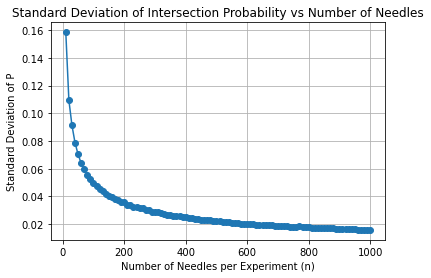

In [1]:
## Task 2 for n trials
import random 
import time 
import math
import numpy as np
import matplotlib.pyplot as plt

needle_length = 0.7
space_btw_line = 1
trials = 100

no_of_needles = list(range(10, 1001, 10))

std_deviations = []

for n in no_of_needles:
    Probibility = []
    
    for i in range(trials):
        crossed_line_count = 0
        for K in range(n):
            
            d_btw_needle_line = random.uniform(0,space_btw_line/2)
            angle_btw_needle_line = random.uniform(0,math.pi/2)
        
            # print(d_btw_needle_line,angle_btw_needle_line)
        
            crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
            # print(crossing_line)
            if crossing_line > d_btw_needle_line:
                crossed_line_count = crossed_line_count + 1
            else:
                continue
        P = crossed_line_count/n
        Probibility.append(P)
        # print(f"Probability of getting the needle crossed with quantity{n} is {Probibility}")
    Std_Dev = np.std(Probibility)
    std_deviations.append(Std_Dev)

plt.plot(no_of_needles, std_deviations, marker='o')
plt.title("Standard Deviation of Intersection Probability vs Number of Needles")
plt.xlabel("Number of Needles per Experiment (n)")
plt.ylabel("Standard Deviation of P")
plt.grid(True)
plt.show()

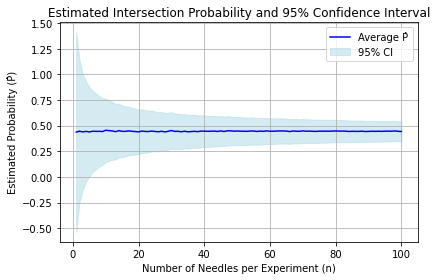

In [3]:
#task 3
import random
import math
import numpy as np
import matplotlib.pyplot as plt

needle_length = 0.7
space_btw_line = 1
trials = 1000
no_of_needles = list(range(1, 101, 1))

avg_prob = []
lower_Prob = []
higher_Prob = []

for n in no_of_needles:
    Probabilities = []
    
    for i in range(trials):
        crossed_line_count = 0
        for K in range(n):
            d = random.uniform(0, space_btw_line / 2)
            angle = random.uniform(0, math.pi / 2)
            crossing_line = math.sin(angle) * (needle_length / 2)
            if crossing_line > d:
                crossed_line_count += 1

        P_hat = crossed_line_count / n
        Probabilities.append(P_hat)

    avg_p = np.mean(Probabilities)
    avg_prob.append(avg_p)

    error = 1.96 * math.sqrt((avg_p * (1 - avg_p)) / n)
    lower_Prob.append(avg_p - error)
    higher_Prob.append(avg_p + error)


plt.plot(no_of_needles, avg_prob, label='Average P̂', color='blue')
plt.fill_between(no_of_needles, lower_Prob, higher_Prob, color='lightblue', alpha=0.5, label='95% CI')
plt.title("Estimated Intersection Probability and 95% Confidence Interval")
plt.xlabel("Number of Needles per Experiment (n)")
plt.ylabel("Estimated Probability (P̂)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#task 4
import random
import math
import numpy as np
import matplotlib.pyplot as plt

needle_length = 0.7
space_btw_line = 1
trials = 1000
no_of_needles = list(range(1, 101, 1))

true_probability = (2*needle_length)/(space_btw_line*math.pi)
print("True Probability calculated ", true_probability)

outside_confidence_interval = []

for n in no_of_needles:
    outside_prob_range = 0
    for i in range(trials):
        crossed_line_count = 0
        for K in range(n):
            
            d_btw_needle_line = random.uniform(0,space_btw_line/2)
            angle_btw_needle_line = random.uniform(0,math.pi/2)
        
            # print(d_btw_needle_line,angle_btw_needle_line)
        
            crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
            # print(crossing_line)
            if crossing_line > d_btw_needle_line:
                crossed_line_count = crossed_line_count + 1
            else:
                continue
        P = crossed_line_count/n
        #according to formula 
        error = 1.96 * math.sqrt((1/n)*P*(1-P))
        lower_val = P - error
        higher_val = P + error

        if true_probability < lower_val or true_probability > higher_val:
            outside_prob_range = outside_prob_range + 1

    ratio = outside_prob_range / trials
    outside_confidence_interval.append(ratio)
    

plt.plot(no_of_needles, outside_confidence_interval, label='Ratio Outside CI (Actual)', color='red')
plt.axhline(0.05, linestyle='--', color='gray', label='Expected 5%')
plt.title("Ratio of Times True Probability is Outside 95% CI")
plt.xlabel("Number of Needle Throws per Experiment (n)")
plt.ylabel("Proportion Outside CI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()